<a href="https://colab.research.google.com/github/Vetha-vikashini/Ml_final/blob/main/MLfinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn.model_selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data=pd.read_csv("/content/apple_quality.csv")

In [ ]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [ ]:
data.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good
3999,3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,good


In [ ]:
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [ ]:
data.corr()

<ipython-input-7-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
A_id,1.000000,-0.028911,-0.005730,-0.002378,-0.013111,0.006179,0.000742,-0.022237
Size,-0.028911,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218
Weight,-0.005730,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414
Sweetness,-0.002378,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999
Crunchiness,-0.013111,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943
Juiciness,0.006179,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714
Ripeness,0.000742,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669
Acidity,-0.022237,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000


In [ ]:
def encode(val):
  if val.casefold()=='good':
    return 1
  else:
    return 0

In [ ]:
data['Quality']=data['Quality'].apply(encode)

In [ ]:
x=data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness','Ripeness', 'Acidity']].values

In [ ]:
y=data['Quality'].values

In [ ]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [ ]:
x.shape

(4000, 7)

In [ ]:
y.shape

(4000,)

In [ ]:
y=y.reshape(-1,1)

In [ ]:
y.shape

(4000, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(3200, 7)

In [ ]:
y_train.shape

(3200, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)

**KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [ ]:
model_knn.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_pred_knn=model_knn.predict(x_test)

In [ ]:
model_knn.score(x_test,y_test)

0.90125

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score

In [ ]:
con_matrix1=confusion_matrix(y_test,y_pred_knn)

In [ ]:
print(con_matrix1)

[[362  40]
 [ 39 359]]


In [ ]:
precision_knn=precision_score(y_test,y_pred_knn)
accuracy_knn=accuracy_score(y_test,y_pred_knn)
recall_knn=recall_score(y_test,y_pred_knn)
f1_knn=f1_score(y_test,y_pred_knn)

In [ ]:
print("precision_knn=",precision_knn,"accuracy_knn=",accuracy_knn,"recall_knn=",recall_knn,"f1_knn=",f1_knn)

precision_knn= 0.899749373433584 accuracy_knn= 0.90125 recall_knn= 0.9020100502512562 f1_knn= 0.9008782936010037


**Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_tree=DecisionTreeClassifier()

In [ ]:
model_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dec=model_tree.predict(x_test)

In [ ]:
model_tree.score(x_test,y_test)

0.81

In [ ]:
con_matrix_tree=confusion_matrix(y_test,y_pred_dec)

In [ ]:
print(con_matrix_tree)

[[321  81]
 [ 71 327]]


In [ ]:
precision_tree=precision_score(y_test,y_pred_dec)
recall_tree=recall_score(y_test,y_pred_dec)
accuracy_tree=accuracy_score(y_test,y_pred_dec)
f1_tree=f1_score(y_test,y_pred_dec)

In [ ]:
print("precision_tree=",precision_tree,"accuracy_tree=",accuracy_tree,"recall_tree=",recall_tree,"f1_tree=",f1_tree)

precision_tree= 0.8014705882352942 accuracy_tree= 0.81 recall_tree= 0.821608040201005 f1_tree= 0.8114143920595535


**Logic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_logistic=LogisticRegression()

In [ ]:
model_logistic.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred_log=model_logistic.predict(x_test)

In [ ]:
model_logistic.score(x_test,y_test)

0.75

In [ ]:
con_matrix3=confusion_matrix(y_test,y_pred_log)

In [ ]:
print(con_matrix3)

[[297 105]
 [ 95 303]]


In [ ]:
precision_log=precision_score(y_test,y_pred_log)
recall_log=recall_score(y_test,y_pred_log)
accuracy_log=accuracy_score(y_test,y_pred_log)
f1_log=f1_score(y_test,y_pred_log)

In [ ]:
print("precision_log=",precision_log,"accuracy_log=",accuracy_log,"recall_log=",recall_log,"f1_log=",f1_log)

precision_log= 0.7426470588235294 accuracy_log= 0.75 recall_log= 0.7613065326633166 f1_log= 0.7518610421836229


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_ran=RandomForestClassifier()

In [ ]:
model_ran.fit(x_train,y_train)

<ipython-input-53-5af72082463a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_ran.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
y_pred_ran=model_ran.predict(x_test)

In [ ]:
model_ran.score(x_test,y_test)

0.87875

In [ ]:
con_matrix4=confusion_matrix(y_test,y_pred_ran)

In [ ]:
print(con_matrix4)

[[352  50]
 [ 47 351]]


In [ ]:
precision_ran=precision_score(y_test,y_pred_ran)
recall_ran=recall_score(y_test,y_pred_ran)
accuracy_ran=accuracy_score(y_test,y_pred_ran)
f1_ran=f1_score(y_test,y_pred_ran)

In [ ]:
print("precision_ran=",precision_ran,"accuracy_ran=",accuracy_ran,"recall_ran=",recall_ran,"f1_ran=",f1_ran)

precision_ran= 0.8753117206982544 accuracy_ran= 0.87875 recall_ran= 0.8819095477386935 f1_ran= 0.8785982478097623


**Support Vector Machines**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm=SVC()

In [ ]:
model_svm.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_pred_svm=model_svm.predict(x_test)

In [ ]:
model_svm.score(x_test,y_test)

0.895

In [ ]:
con_matrix5=confusion_matrix(y_test,y_pred_svm)

In [ ]:
print(con_matrix5)

[[360  42]
 [ 42 356]]


In [ ]:
precision_svm=precision_score(y_test,y_pred_svm)
recall_svm=recall_score(y_test,y_pred_svm)
accuracy_svm=accuracy_score(y_test,y_pred_svm)
f1_svm=f1_score(y_test,y_pred_svm)

In [ ]:
print("precision_svm=",precision_svm,"accuracy_svm=",accuracy_svm,"recall_svm=",recall_svm,"f1_svm=",f1_svm)

precision_svm= 0.8944723618090452 accuracy_svm= 0.895 recall_svm= 0.8944723618090452 f1_svm= 0.8944723618090452


In [ ]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
from sklearn import model_selection

In [ ]:
def sco(nam):
  return nam.score(x_test,y_test)

In [ ]:
models={"KNN":sco(model_knn),"CART":sco(model_tree),"LR":sco(model_logistic),"RAN":sco(model_ran),"SVM":sco(model_svm)}

In [ ]:
print(models)

{'KNN': 0.90125, 'CART': 0.81, 'LR': 0.75, 'RAN': 0.87875, 'SVM': 0.895}


In [ ]:
high_score=max(models)

In [ ]:
print("Algorithm with more score:",high_score)

Algorithm with more score: SVM


In [ ]:
import matplotlib.pyplot as plt


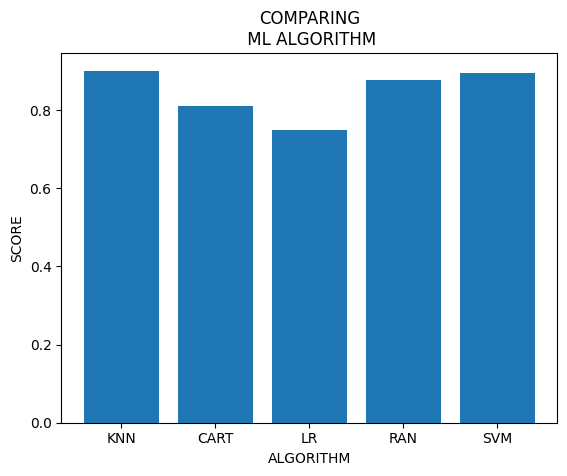

In [ ]:
x=list(models.keys())
y=list(models.values())
plt.xlabel("ALGORITHM")
plt.ylabel("SCORE")
plt.title("COMPARING\n ML ALGORITHM")
plt.bar(range(len(models)),y,tick_label=x)
plt.show()

In [ ]:
model_dict={
    'KNN':model_knn,
    'CART':model_tree,
    'Logistic':model_logistic,
    'RAN':model_ran,
    'SVM':model_svm
}

In [ ]:
import pickle

In [ ]:
with open("mlmodel_dic.pkl","wb") as f:
    pickle.dump(model_dict,f)

I,here used dataset which deals with apple quality so
it comes under classification problem.
In this i tarined the ML model using 80% of dataset and i kept 20% of dataset for testing purpose.
Here I trained 5 types of model

*  K-Nearest Neighbors Classifier
*  Decision tree
*  Logistic Regression
*  Random Forest Classifier
*  Support Vector Machines

After that i drawn confusion matrix for each model and print the evaluations like precision_score,acuracy_score,f1_score,recall_score.
Then I dumped my trained models using pickle module in Python.




*italicized text*

